In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('khusnul.csv')
df

,price,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated
0,221900,3,1,1,7,1955,0
1,538000,3,2,2,7,1951,1991
2,180000,2,1,1,6,1933,0
3,604000,4,3,1,7,1965,0
4,510000,3,2,1,8,1987,0
...,...,...,...,...,...,...,...
546,782000,4,3,2,10,1991,0
547,259950,2,2,2,9,2008,0
548,315000,4,3,1,7,1979,0
549,215000,2,1,1,6,1943,0


In [15]:
df.shape

(551, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         551 non-null    int64
 1   bedrooms      551 non-null    int64
 2   bathrooms     551 non-null    int64
 3   floors        551 non-null    int64
 4   grade         551 non-null    int64
 5   yr_built      551 non-null    int64
 6   yr_renovated  551 non-null    int64
dtypes: int64(7)
memory usage: 30.3 KB


In [17]:
df.describe()

,price,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated
count,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,5.312048e+05,3.359347,2.261343,1.490018,7.664247,1968.724138,97.842105
std,3.613804e+05,0.849438,0.842471,0.532055,1.209722,28.107458,431.434780
min,8.000000e+04,1.000000,1.000000,1.000000,4.000000,1900.000000,0.000000
25%,3.065000e+05,3.000000,2.000000,1.000000,7.000000,1952.000000,0.000000
50%,4.380000e+05,3.000000,2.000000,1.000000,7.000000,1973.000000,0.000000
75%,6.500000e+05,4.000000,3.000000,2.000000,8.000000,1991.500000,0.000000
max,3.075000e+06,6.000000,5.000000,3.000000,12.000000,2014.000000,2014.000000


In [18]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['bathrooms'] = df['bathrooms'].astype('int')
#Mengganti nilai 33 menjadi 3.
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [19]:
df.isnull().sum()

price           0
bedrooms        0
bathrooms       0
floors          0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

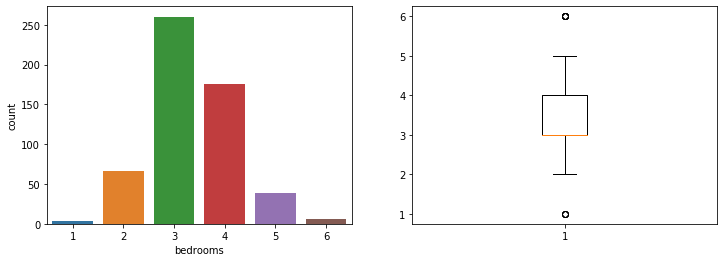

In [21]:
#Univariate analysis bedrooms.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])
f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

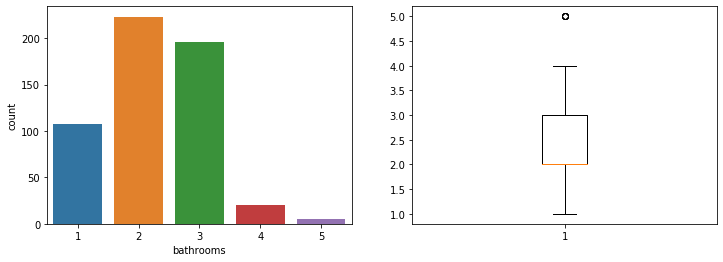

In [22]:
#Univariate analysis bathrooms.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])
f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

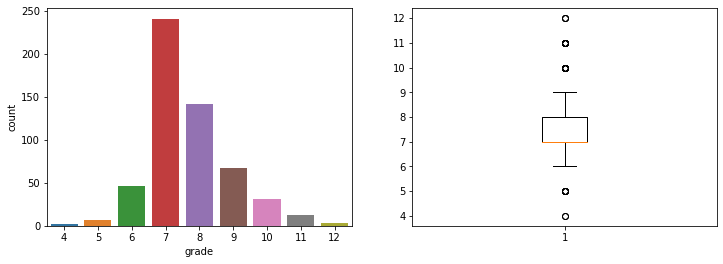

In [24]:
#Univariate analysis grade.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['grade'])
f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

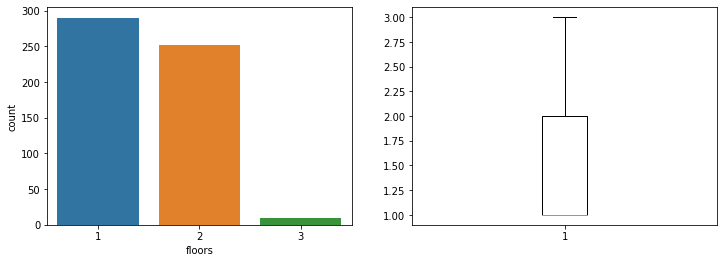

In [38]:
#Univariate analysis grade.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['floors'])
f.add_subplot(1,2,2)
plt.boxplot(df['floors'])
plt.show()

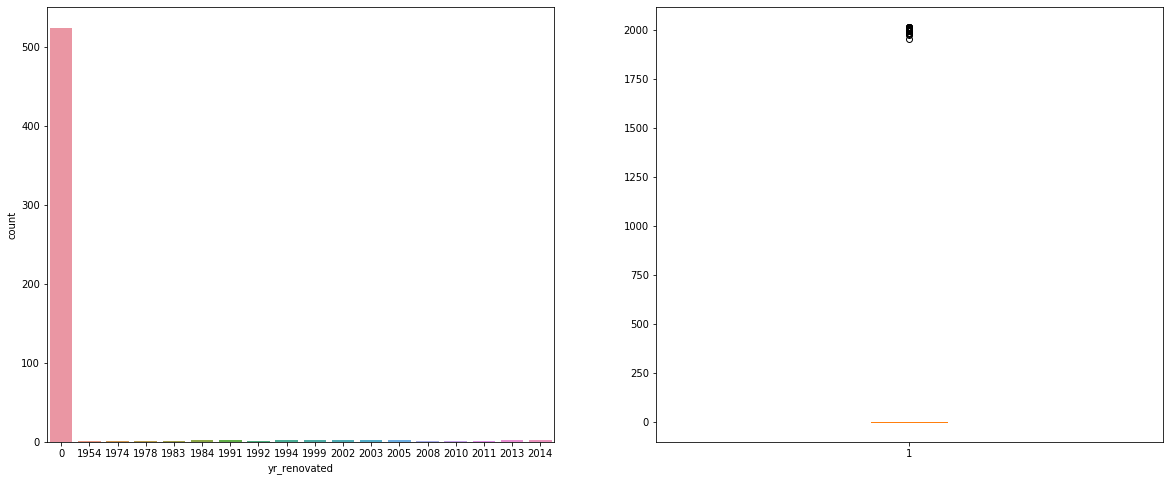

In [42]:
#Univariate analysis yr_built.

f = plt.figure(figsize=(20,8))
f.add_subplot(1,2,1)
sns.countplot(df['yr_renovated'])
f.add_subplot(1,2,2)
plt.boxplot(df['yr_renovated'])
plt.show()

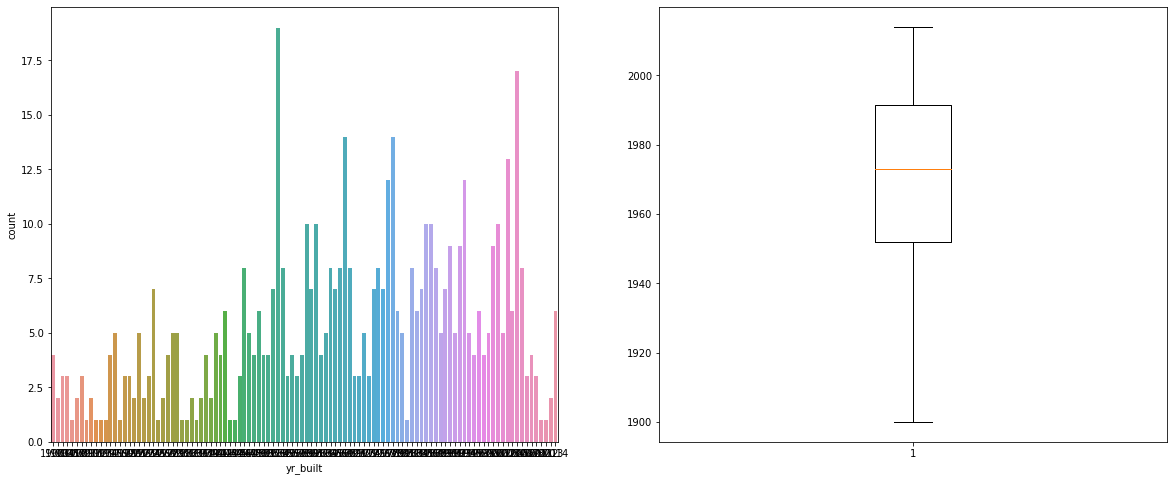

In [25]:
#Univariate analysis yr_built.

f = plt.figure(figsize=(20,8))
f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])
f.add_subplot(1,2,2)
plt.boxplot(df['yr_built'])
plt.show()

C:\Users\rambo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

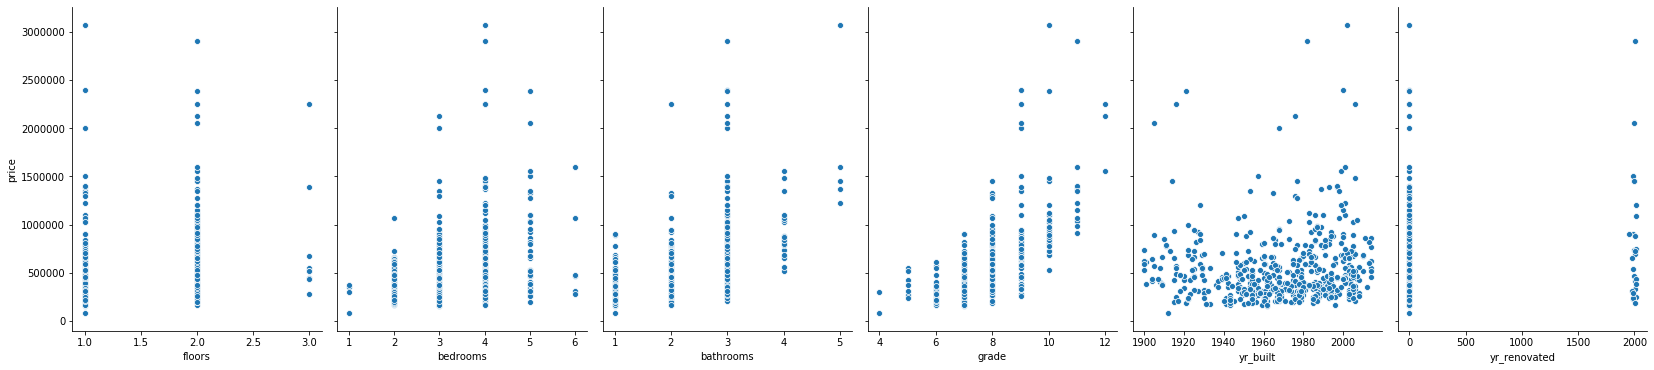

In [43]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['floors','bedrooms', 'bathrooms', 'grade', 'yr_built','yr_renovated'], y_vars=['price'], size=5, aspect=0.75)

In [29]:
df.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated
price,1.00,0.33,0.46,0.26,0.67,0.07,0.18
bedrooms,0.33,1.00,0.47,0.24,0.42,0.20,0.02
bathrooms,0.46,0.47,1.00,0.44,0.67,0.55,0.06
floors,0.26,0.24,0.44,1.00,0.41,0.27,0.08
grade,0.67,0.42,0.67,0.41,1.00,0.45,0.01
yr_built,0.07,0.20,0.55,0.27,0.45,1.00,-0.28
yr_renovated,0.18,0.02,0.06,0.08,0.01,-0.28,1.00


In [30]:
#Pertama, buat variabel x dan y.
x = df.drop(columns='price')
y = df['price']
#Kedua, split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Ketiga, bikin object linear regresi.
lin_reg = LinearRegression()
#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 8.88198310e+03  5.61402941e+04  3.15786135e+03  1.98914417e+05
 -4.01268793e+03  3.45181594e+01]
6741159.380635537


In [35]:
lin_reg.score(x_test, y_test)

0.48344618647514015

In [45]:
lin_reg.predict([[2,2,2,6,1990,0]])

array([85757.18366268])